### Explore Time lag

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from causaldynamics.scm import create_scm_graph, GNR
from causaldynamics.plot import  plot_trajectories, plot_scm

from causaldynamics.creator import create_scm, simulate_system

mpl.rcParams['animation.embed_limit'] = 50 * 1024**2  # 50MB


In [3]:
# Build the SCM
num_nodes = 4
dims = 3
num_timesteps = 500
time_lag = 100
time_lag_edge_probability = 0.1
A, W, b, root_nodes, magnitudes = create_scm(
    num_nodes,
    dimensions=3,
    confounders=False,
    graph="scale-free" if num_nodes > 3 else "all_uniform",
    time_lag=time_lag,
    time_lag_edge_probability=time_lag_edge_probability
)
print(A)



INFO - Creating SCM with 4 nodes and 3 dimensions...


tensor([[[0., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [4]:
da = simulate_system(
            A, W, b,
            num_timesteps=num_timesteps,
            num_nodes=num_nodes,
            init_ratios=[1., 0., 0.],
            init=None,
            standardize=False,
            system_name="random",
            time_lag=5,
            make_trajectory_kwargs={"resample": True, "noise": 0.},
            do_at_time=None,
            intervention="remove_edge",
            remove_from_node=-1
        )


INFO - Simulating random system for 500 timesteps...


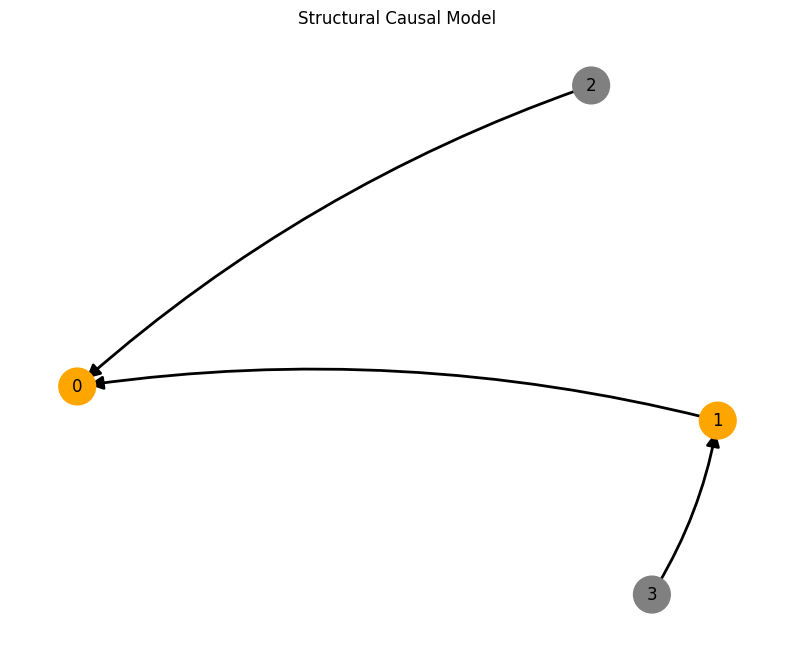

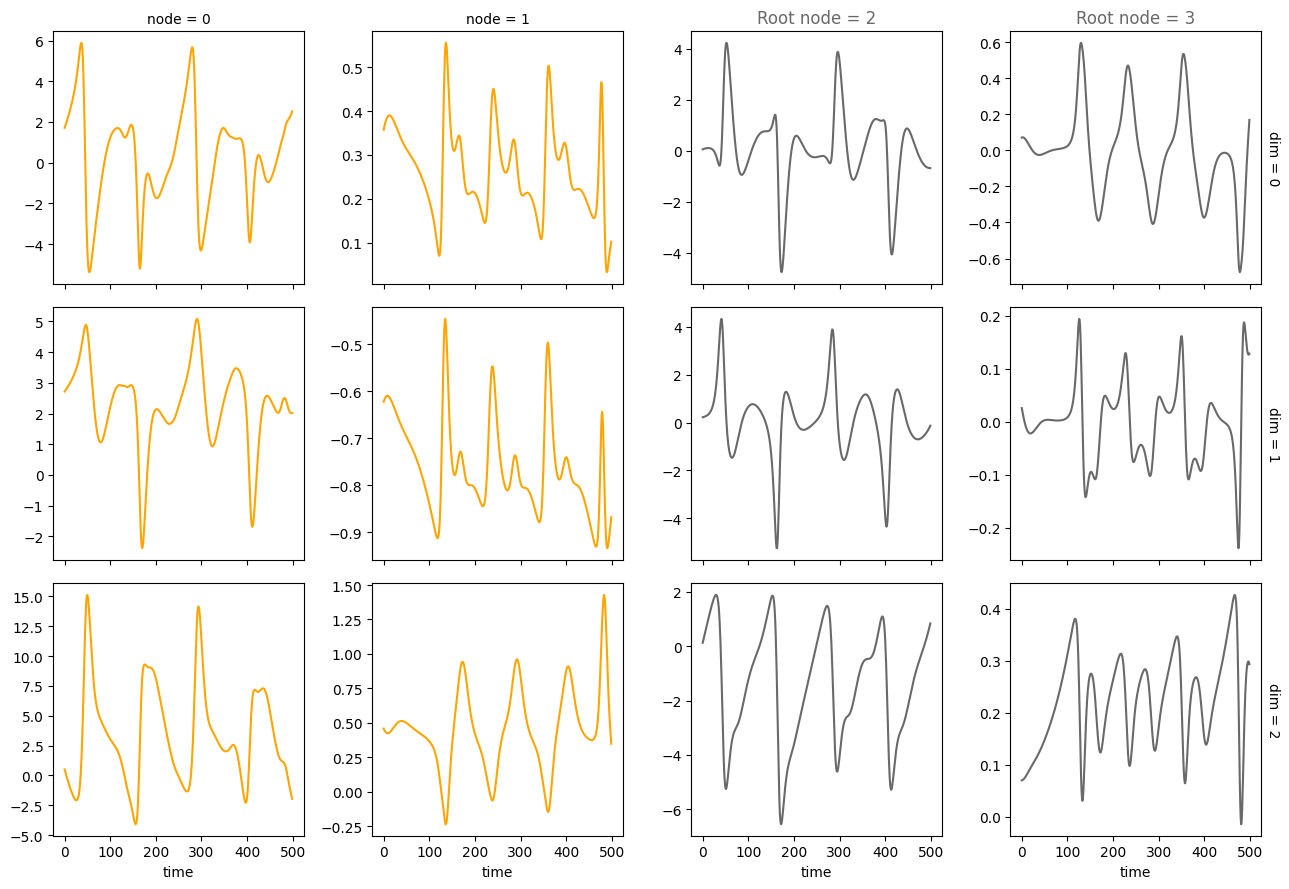

In [5]:
plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plt.show()

# Plot the trajectories
plot_trajectories(da, root_nodes, sharey=False)
plt.show()

# # Animate the trajectories
# anim = animate_3d_trajectories(da, frame_skip=5, rotation_speed=0.2, rotate=True , show_history=True, plot_type='subplots', root_nodes=root_nodes)
# display(anim)
